In [1]:
%run utilities.ipynb 
load_standard_packages()
change_wordir()

import joblib

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.58.0


In [2]:
colors, colours = colourblind_palette("own")

#model = "PSI_only_ODE"
model = "PSI_only_QSSA"
#model = "cyclic_2021"
#model = "cyclic_2021_ODE"
#model = "new_PSI"
#model = "new_PSII"
#model = "latest_dev"

m = load_model(model)


succesfully loaded PSI_only_QSSA :D


# Model

In [4]:
stoichio_subset = m.get_stoichiometric_df()

#stoichio_subset = stoichio_subset.loc[["B0", "B1", "B2", "PQ"],:]
#stoichio_subset.loc[(stoichio_subset != 0).any(axis = 1)]
#stoichio_subset.loc[:, (stoichio_subset != 0).any(axis = 0)]

stoichio_subset.loc[:, (stoichio_subset != 0).any(axis = 0)]

,vFdred,vPS1,vPS1_electron_error
Fd,-1.0,0.0,0.0
PC,0.0,1.0,0.0
e-,0.0,0.0,-1.0
ps2cs,0.0,0.0,0.0


In [4]:
#m.get_algebraic_module("P700+FA_alm")
print(m.get_algebraic_module("k_b6f"))
#m.get_algebraic_module("rel_P700+FA_alm")

KeyError: 'k_b6f'

In [5]:
#m.get_compound_stoichiometry("PC")
m.get_compound_stoichiometry("PC")

{'vPS1': 1}

In [5]:
#m.get_parameter("k1")
m.get_parameter("pKreg")

6.5

In [6]:
#m.get_rate_args("v2_to_P700FA-")
m.get_rate_args("vB6f")

['PC', 'PCred', 'PQ', 'PQred', 'k_b6f', 'Keq_B6f']

In [7]:
#m.get_rate_function("v2_to_P700FA-")(1,2,3,4,5,6)
m.get_rate_function("vB32Q")(1,0,1,2)

2

In [5]:
m.check_unused_compounds()

set()

In [3]:
m.check_missing_parameters()

set()

In [4]:
set(m.check_unused_parameters())- {'APX0','ATPcyt','CN','Ca','Ctot','E0_cytf','Keq_cyc','Km161','Km162','Kmnadph','NADPHcyt','bH','dT','k1','k1APX','k1rev','k2APX',
                                    'k3APX','k4','k4APX','k5','k5APX','k6','k7','k8','kATPcons','kActATPase','kDeactATPase','kNADPHcons','kNh','kNr','kProtonation','kdeg','krep','nH','pHmedium','prob_attach'}

{'k'}

# Simulator

In [7]:
# y0 = get_stst_y0(m, pfd=800)

y0 = {'P700FA': 2.5, # all PSI in ground state
    'P700pFAm': 0.0,
    'P700FAm': 0.0,
    'PC': 0,         # all PC in reduced state
    'Fd': 5.0,       # all Fd in oxidized state
    'ps2cs': 0.525,
    'e-': 6.5 # initial moles of electrons
}

In [9]:
s = Simulator(m)
s.initialise(y0)
t_end = .5
steps_per_second = 100

steps = steps_per_second * t_end

pfd = 100
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = t_end, steps = steps)

<Axes: >

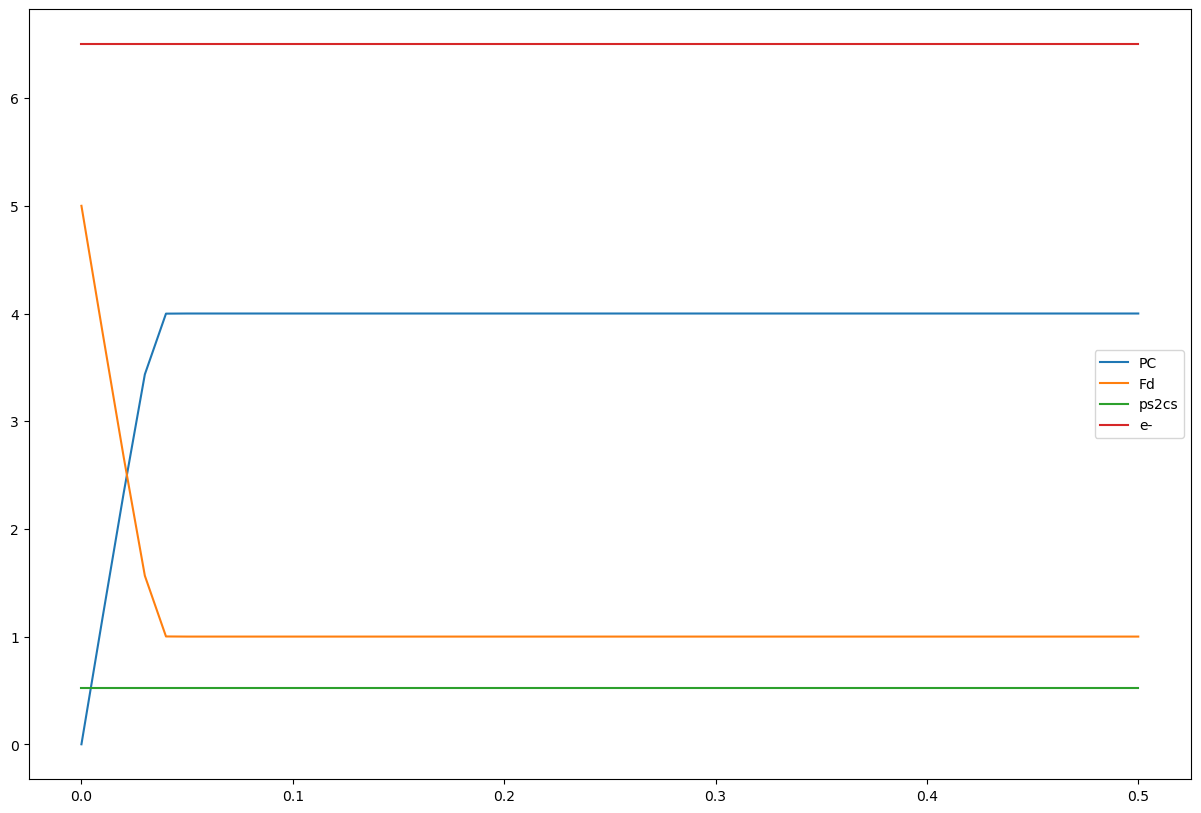

In [10]:
s.get_results_df().plot(figsize = (15,10))

In [11]:
results = s.get_full_results_df()

# check if results are identical

In [9]:
#results

In [ ]:
#results2 = results.copy()

In [ ]:
joblib.dump(results, "tmp/result_test.joblib")

['tmp/result_weird_function.joblib']

In [ ]:
results2 = joblib.load("tmp/result_test.joblib")

In [7]:
results2.columns[np.where(results.columns != results2.columns)]

Index(['B3', 'PQred', 'PCred', 'Fdred', 'ADP', 'NADP', 'LHCp', 'Zx', 'Psbsp',
       'ps2cs', 'Q', 'Fluo', 'Pi', 'N'],
      dtype='object')

In [8]:
# reorder the columns if necessary!
results = results[results2.columns]

In [9]:
(results2 == results).all().all()

np.False_

In [20]:
(abs(1- results2 / results) < 1e-3 ).all().all()

np.True_

In [28]:
(1-results2 / results).mean().mean()

np.float64(-4.1035795207128936e-09)

In [13]:
abs(1- results2 / results)

,PQ,PC,Fd,ATP,NADPH,H,LHC,Psbs,Vx,PGA,...,rel_P700+FA,rel_P700FA,rel_P700FA-,rel_P700+FA-,rel_P700,rel_P700+,rel_B0,rel_B1,rel_B2,rel_B3
0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.01,9.303669e-14,1.654232e-13,1.398881e-14,3.996803e-15,4.440892e-16,2.087219e-14,1.110223e-16,8.881784e-16,2.220446e-16,1.110223e-15,...,5.876410e-13,1.909584e-14,8.659740e-14,2.468026e-13,1.931788e-14,5.860867e-13,8.062440e-13,8.093526e-13,1.016109e-11,4.624010e-07
0.02,3.608225e-14,2.795542e-13,2.575717e-14,8.992806e-15,7.771561e-16,5.018208e-14,5.551115e-16,9.992007e-16,0.000000e+00,1.110223e-15,...,5.208944e-12,1.518785e-13,7.982504e-14,4.102718e-12,1.517675e-13,5.204281e-12,2.442491e-15,1.554312e-15,2.819966e-14,1.310776e-07
0.03,2.065015e-14,1.503464e-12,1.110223e-16,6.550316e-15,1.110223e-15,4.880540e-13,4.440892e-16,1.221245e-15,2.220446e-16,7.771561e-16,...,3.470291e-11,9.752199e-13,1.205036e-12,2.438483e-11,9.758860e-13,3.465761e-11,4.773959e-15,5.218048e-15,6.394885e-14,8.771773e-08
0.04,2.613465e-13,4.012124e-12,3.996803e-15,5.362377e-14,3.996803e-15,1.104006e-12,5.551115e-16,1.332268e-15,2.220446e-16,2.553513e-15,...,2.583378e-11,7.189804e-13,8.397727e-13,1.858091e-11,7.192025e-13,2.580203e-11,5.129230e-14,5.162537e-14,6.596945e-13,1.097173e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.96,6.049983e-09,3.067209e-09,1.299816e-09,6.526417e-09,3.229557e-09,1.448655e-09,4.092306e-10,8.811986e-09,1.320919e-09,2.009907e-08,...,3.799813e-09,7.265410e-11,4.914026e-09,1.639074e-09,8.846035e-11,3.770230e-09,1.495591e-09,3.694397e-10,1.332976e-08,8.664480e-08
99.97,6.061073e-09,3.082211e-09,1.306336e-09,6.597781e-09,3.241821e-09,1.631887e-09,4.090401e-10,8.811794e-09,1.320942e-09,2.029647e-08,...,3.836454e-09,7.341705e-11,4.943476e-09,1.627542e-09,8.931711e-11,3.806735e-09,1.498744e-09,3.660420e-10,1.335796e-08,3.938429e-08
99.98,6.072249e-09,3.097434e-09,1.312899e-09,6.669077e-09,3.254082e-09,1.817227e-09,4.088501e-10,8.811601e-09,1.320966e-09,2.049369e-08,...,3.873631e-09,7.419232e-11,4.973162e-09,1.615658e-09,9.018664e-11,3.843774e-09,1.501904e-09,3.626324e-10,1.338623e-08,7.876916e-09
99.99,6.083511e-09,3.112880e-09,1.319504e-09,6.740306e-09,3.266339e-09,2.004689e-09,4.086600e-10,8.811406e-09,1.320989e-09,2.069072e-08,...,3.911374e-09,7.497980e-11,5.003087e-09,1.603420e-09,9.106915e-11,3.881379e-09,1.505074e-09,3.592107e-10,1.341459e-08,3.938487e-08
